In [10]:
!pip install emoji


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
df = pd.read_csv('pre_proc_data_pt_brazil.csv', sep=',')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149874 entries, 0 to 5149873
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   text             object 
 2   created_at       object 
 3   text_sentiment   object 
 4   sentiment_value  float64
 5   date             object 
 6   sentiment        object 
dtypes: float64(1), int64(1), object(5)
memory usage: 275.0+ MB


In [14]:
# df_pos_neg = (df[df['sentiment'] != 'Neutro'])[['text', 'created_at', 'text_sentiment',
#        'sentiment_value', 'date', 'sentiment']].reset_index(drop=True)

In [15]:
df_pos_neg = df[['text', 'created_at', 'text_sentiment',
       'sentiment_value', 'date', 'sentiment']].sample(n=200000, random_state=42).reset_index(drop=True)

In [16]:
df_pos_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   text             200000 non-null  object 
 1   created_at       200000 non-null  object 
 2   text_sentiment   200000 non-null  object 
 3   sentiment_value  200000 non-null  float64
 4   date             200000 non-null  object 
 5   sentiment        200000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.2+ MB


In [17]:
df_pos_neg.head()

,text,created_at,text_sentiment,sentiment_value,date,sentiment
0,RT @emirsader: Após ficar em silêncio na CPI d...,2021-07-04 22:17:21,"{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp...",0.7125,2021-07-04,Positivo
1,RT @VittorGuidoni: para de lamber fone de ouvi...,2019-11-30 14:35:33,"{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...",-0.5859,2019-11-30,Negativo
2,@exposed_exposer @CarlaZambelli38 @andrizek De...,2022-01-11 12:12:28,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",-0.5994,2022-01-11,Negativo
3,RT @canaltech: Por que o iPhone é mais seguro ...,2019-11-19 14:52:06,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4404,2019-11-19,Positivo
4,RT @mariareinhardtt: covid tá a estragar compl...,2021-12-28 23:09:10,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...",-0.2500,2021-12-28,Negativo


In [18]:
df_pos_neg['len'] = df_pos_neg.apply(lambda x: len(x['text']), axis=1)

(array([2.3340e+03, 1.0118e+04, 1.6232e+04, 1.8218e+04, 1.8426e+04,
        1.9165e+04, 7.9382e+04, 5.8430e+03, 4.3610e+03, 4.0480e+03,
        3.5990e+03, 4.0430e+03, 3.3780e+03, 5.8030e+03, 3.8590e+03,
        8.2100e+02, 2.2900e+02, 6.4000e+01, 1.4000e+01, 1.2000e+01,
        1.0000e+00, 6.0000e+00, 4.0000e+00, 7.0000e+00, 4.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([  8.  ,  27.76,  47.52,  67.28,  87.04, 106.8 , 126.56, 146.32,
        166.08, 185.84, 205.6 , 225.36, 245.12, 264.88, 284.64, 304.4 ,
        324.16, 343.92, 363.68, 383.44, 403.2 , 422.96, 442.72, 462.48,
        482.24, 502.  , 521.76, 541.52, 561.28, 581.04, 600.8 , 620.56,
        640.32, 660.08, 679.84

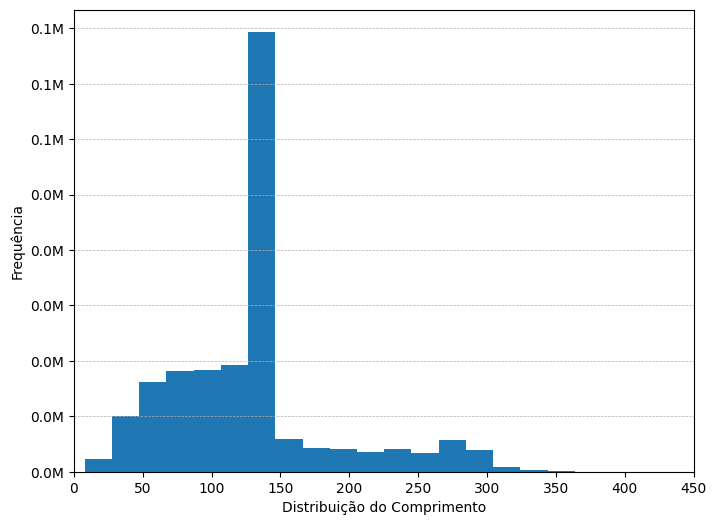

In [19]:
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize = (8, 6))
plt.xlabel("Distribuição do Comprimento")
plt.ylabel("Frequência")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.xlim((0, 450))
ax.yaxis.set_major_formatter(formatter)
ax.hist(df_pos_neg['len'], bins=50)

### NLP

In [20]:
emoji_bank = {
  ",:(": "😓",
  ",:)": "😅",
  ",:-(": "😓",
  ",:-)": "😅",
  "0:)": "😇",
  "0:-)": "😇",
  "8-)": "😎",
  ":$": "😒",
  ":'(": "😢",
  ":')": "😂",
  ":'-(": "😢",
  ":'-)": "😂",
  ":'-D": "😂",
  ":'D": "😂",
  ":(": "😦",
  ":)": "😃",
  ":*": "😗",
  ":,'(": "😭",
  ":,'-(": "😭",
  ":,(": "😢",
  ":,)": "😂",
  ":,-(": "😢",
  ":,-)": "😂",
  ":,-D": "😂",
  ":,D": "😂",
  ":-$": "😒",
  ":-(": "😦",
  ":-)": "😃",
  ":-*": "😗",
  ":-/": "😕",
  ":-@": "😡",
  ":-D": "😄",
  ":-o": "😮",
  ":-O": "😮",
  ":-P": "😛",
  ":-S": "😒",
  ":-Z": "😒",
  ":-|": "😐",
  ":/": "😕",
  ":@": "😡",
  ":D": "😄",
  ":o": "😮",
  ":O": "😮",
  ":P": "😛",
  ":s": "😒",
  ":z": "😒",
  ":|": "😐",
  ";(": "😭",
  ";)": "😉",
  ";-(": "😭",
  ";-)": "😉",
  "]:)": "😈",
  "]:-)": "😈",
  "B-)": "😎",
  "o:)": "😇",
  "O:)": "😇",
  "O:-)": "😇",
  "o:-)": "😇",
  "X-)": "😆",
  "x-)": "😆"
}

In [21]:
import re, string, unicodedata
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('stopwords')

def extract_emojis(sample):
    return ' '.join(c for c in sample if c in emoji.EMOJI_DATA).split()

def remove_user_from_text(words):
    return " ".join(filter(lambda x:x[0]!='@', words.split()))

def remove_double_space(sample):
    return " ".join(sample.split())

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return list(map(lambda x: x.lower(), words))

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in nltk.corpus.stopwords.words('portuguese'):
            new_words.append(word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list"""
    new_words = []
    for word in words:
        if word.isdigit():
            pass
        else:
            new_words.append(word)
    return new_words


def clean_text(sample):
    emoji_pat = '[\U0001F300-\U0001F64F\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]'
    shrink_whitespace_reg = re.compile(r'\s{2,}')
    reg = re.compile(r'({})|[^a-zA-Z]'.format(emoji_pat)) # line a
    result = reg.sub(lambda x: ' {} '.format(x.group(1)) if x.group(1) else ' ', sample)
    return shrink_whitespace_reg.sub(' ', result)

def replace_asci_emoji(sample):
    address = sample
    for k,v in emoji_bank.items():
        address = address.replace(k, v)
    return address

def normalize(words):
    words = remove_user_from_text(words)
    words = to_lowercase(words.split())
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_asci_emoji(sample)
#     sample = clean_text(sample)
    sample = remove_double_space(sample)
    return normalize(sample)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df_pos_neg['emoji'] = df_pos_neg.apply(lambda x: extract_emojis(replace_asci_emoji(remove_URL(x['text']))), axis=1)

In [23]:
sttt='😃 Oi, http://www.usp.br Eu estou feliz :) @l.malakin! :D'

In [24]:
extract_emojis(replace_asci_emoji(sttt))

['😃', '😕', '😃', '😄']

In [25]:
preprocess(sttt)

['oi', 'feliz']

In [26]:
df_pos_neg['normalized_text'] = df_pos_neg.apply(lambda x: preprocess(x['text']), axis=1)

In [27]:
df_pos_neg.head()

,text,created_at,text_sentiment,sentiment_value,date,sentiment,len,emoji,normalized_text
0,RT @emirsader: Após ficar em silêncio na CPI d...,2021-07-04 22:17:21,"{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp...",0.7125,2021-07-04,Positivo,139,[],"[rt, após, ficar, silêncio, cpi, covid, carlos..."
1,RT @VittorGuidoni: para de lamber fone de ouvi...,2019-11-30 14:35:33,"{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...",-0.5859,2019-11-30,Negativo,139,[],"[rt, lamber, fone, ouvido, lista, doenças, tra..."
2,@exposed_exposer @CarlaZambelli38 @andrizek De...,2022-01-11 12:12:28,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",-0.5994,2022-01-11,Negativo,299,[],"[definição, vacina, tipo, substância, vírus, b..."
3,RT @canaltech: Por que o iPhone é mais seguro ...,2019-11-19 14:52:06,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4404,2019-11-19,Positivo,83,[],"[rt, iphone, seguro, contra, vírus]"
4,RT @mariareinhardtt: covid tá a estragar compl...,2021-12-28 23:09:10,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...",-0.2500,2021-12-28,Negativo,59,[],"[rt, covid, tá, estragar, completamente, tudo]"


In [28]:
df_pos_neg.to_csv('data_pt_brazil_normalized_emoji.csv', sep=',')

In [29]:
df_pos_neg.head()

,text,created_at,text_sentiment,sentiment_value,date,sentiment,len,emoji,normalized_text
0,RT @emirsader: Após ficar em silêncio na CPI d...,2021-07-04 22:17:21,"{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp...",0.7125,2021-07-04,Positivo,139,[],"[rt, após, ficar, silêncio, cpi, covid, carlos..."
1,RT @VittorGuidoni: para de lamber fone de ouvi...,2019-11-30 14:35:33,"{'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...",-0.5859,2019-11-30,Negativo,139,[],"[rt, lamber, fone, ouvido, lista, doenças, tra..."
2,@exposed_exposer @CarlaZambelli38 @andrizek De...,2022-01-11 12:12:28,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",-0.5994,2022-01-11,Negativo,299,[],"[definição, vacina, tipo, substância, vírus, b..."
3,RT @canaltech: Por que o iPhone é mais seguro ...,2019-11-19 14:52:06,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4404,2019-11-19,Positivo,83,[],"[rt, iphone, seguro, contra, vírus]"
4,RT @mariareinhardtt: covid tá a estragar compl...,2021-12-28 23:09:10,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...",-0.2500,2021-12-28,Negativo,59,[],"[rt, covid, tá, estragar, completamente, tudo]"


In [30]:
df_pos_neg.groupby('sentiment').size()

sentiment
Negativo    93560
Neutro      58975
Positivo    47465
dtype: int64